<a href="https://colab.research.google.com/github/rsoma1/Soma_IT533/blob/main/Ravikanth_Week8_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as Match dataframe
mat_df = pd.read_csv("https://raw.githubusercontent.com/rsoma1/Soma_IT533/main/Match.csv")

#Verifying that we can see the data
mat_df.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India


In [4]:
Neural_mat_df = mat_df[['Team_Name_Id','Toss_Winner_Id','Season_Id', 'First_Umpire_Id','Second_Umpire_Id','Toss_Decision']]
Neural_mat_df.head()

,Team_Name_Id,Toss_Winner_Id,Season_Id,First_Umpire_Id,Second_Umpire_Id,Toss_Decision
0,2,2,1,470,477,field
1,4,3,1,471,487,bat
2,6,5,1,472,512,bat
3,7,7,1,473,476,bat
4,1,8,1,474,486,bat


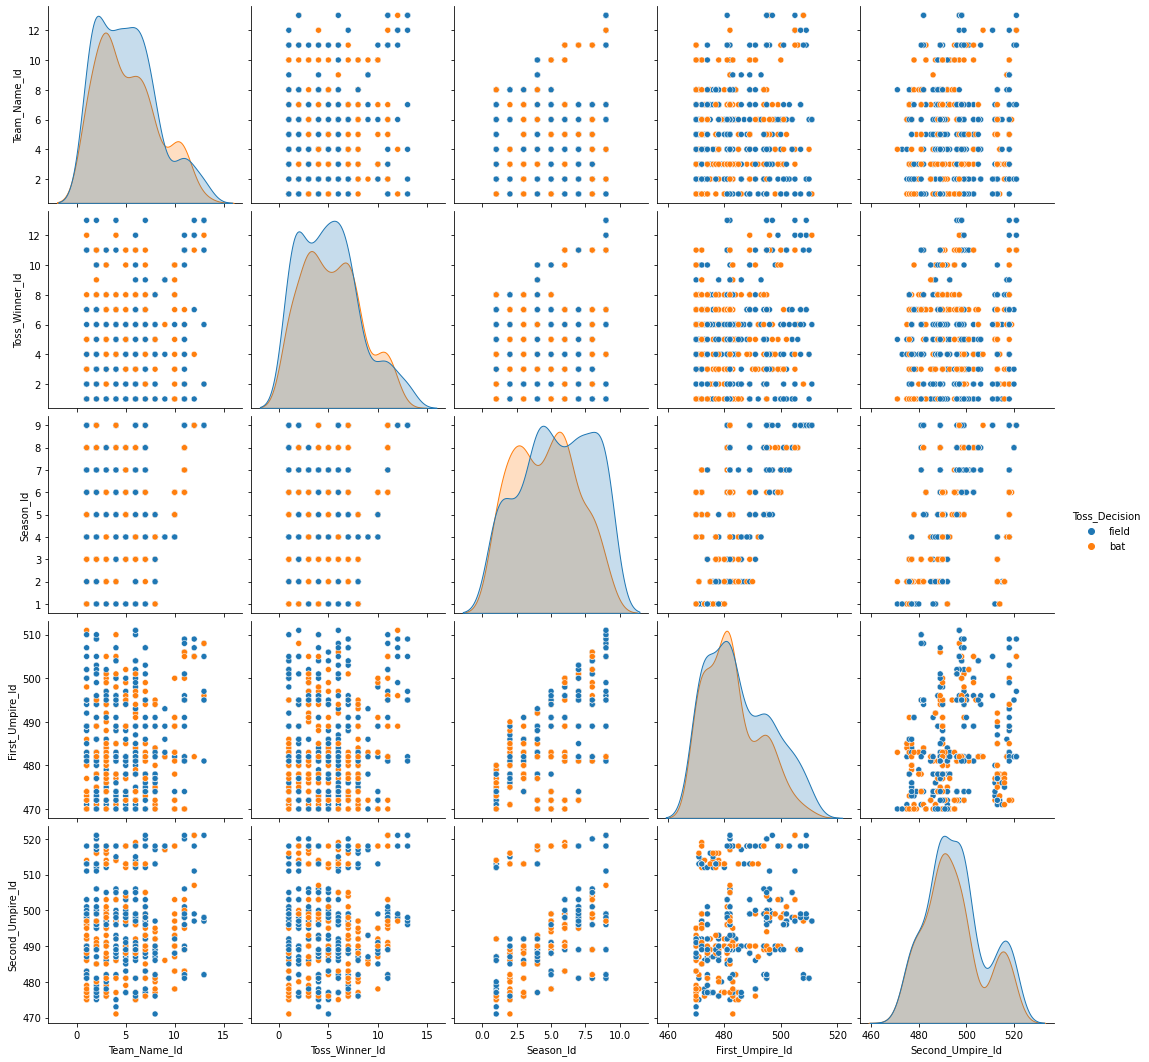

In [5]:
sns.pairplot(Neural_mat_df,hue="Toss_Decision", height=3, diag_kind="kde")

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Neural_mat_df["Toss_Decision"] = labelencoder.fit_transform(Neural_mat_df["Toss_Decision"])
region = pd.DataFrame({'Toss_Decision': ['Team_Name_Id','Toss_Winner_Id','Season_Id', 'First_Umpire_Id','Second_Umpire_Id']})
Neural_mat_df.head()

,Team_Name_Id,Toss_Winner_Id,Season_Id,First_Umpire_Id,Second_Umpire_Id,Toss_Decision
0,2,2,1,470,477,1
1,4,3,1,471,487,0
2,6,5,1,472,512,0
3,7,7,1,473,476,0
4,1,8,1,474,486,0


In [8]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
Neural_mat_df = create_dummies(Neural_mat_df,"Toss_Decision")

Neural_mat_df.head()


,Team_Name_Id,Toss_Winner_Id,Season_Id,First_Umpire_Id,Second_Umpire_Id,Toss_Decision,Toss_Decision_0,Toss_Decision_1
0,2,2,1,470,477,1,0,1
1,4,3,1,471,487,0,1,0
2,6,5,1,472,512,0,1,0
3,7,7,1,473,476,0,1,0
4,1,8,1,474,486,0,1,0


In [9]:
# Features before mean normalization
unscaled_features = Neural_mat_df[['Team_Name_Id','Toss_Winner_Id','Season_Id', 'First_Umpire_Id','Second_Umpire_Id']]

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
unscaled_features_array = sc.fit_transform(unscaled_features.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,Team_Name_Id,Toss_Winner_Id,Season_Id,First_Umpire_Id,Second_Umpire_Id
0,-1.013792,-1.056358,-1.622107,-1.317677,-1.470935
1,-0.360208,-0.725457,-1.622107,-1.224217,-0.660769
2,0.293377,-0.063657,-1.622107,-1.130757,1.364645
3,0.620169,0.598144,-1.622107,-1.037296,-1.551952
4,-1.340584,0.929044,-1.622107,-0.943836,-0.741786


In [10]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = Neural_mat_df['Toss_Decision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34)

In [18]:
from sklearn.neural_network import MLPClassifier
Neural = MLPClassifier(verbose=1)

In [19]:
Neural.fit(X_train, y_train)

Iteration 1, loss = 0.69293766
Iteration 2, loss = 0.68838886
Iteration 3, loss = 0.68483451
Iteration 4, loss = 0.68131936
Iteration 5, loss = 0.67907687
Iteration 6, loss = 0.67613075
Iteration 7, loss = 0.67411732
Iteration 8, loss = 0.67181967
Iteration 9, loss = 0.66953478
Iteration 10, loss = 0.66777722
Iteration 11, loss = 0.66624616
Iteration 12, loss = 0.66490301
Iteration 13, loss = 0.66320513
Iteration 14, loss = 0.66218777
Iteration 15, loss = 0.66088780
Iteration 16, loss = 0.65961084
Iteration 17, loss = 0.65845629
Iteration 18, loss = 0.65743733
Iteration 19, loss = 0.65671650
Iteration 20, loss = 0.65555609
Iteration 21, loss = 0.65444913
Iteration 22, loss = 0.65368939
Iteration 23, loss = 0.65286417
Iteration 24, loss = 0.65198104
Iteration 25, loss = 0.65110349
Iteration 26, loss = 0.65032903
Iteration 27, loss = 0.64960889
Iteration 28, loss = 0.64874995
Iteration 29, loss = 0.64815201
Iteration 30, loss = 0.64733640
Iteration 31, loss = 0.64647116
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [20]:
Neural.score(X_test,y_test)

0.5685279187817259

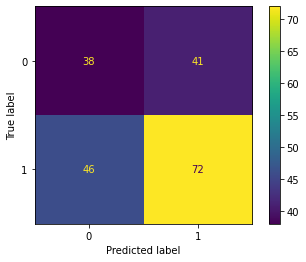

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MLP, X_test, y_test)

2. Tuning the Neural Network

In [44]:
Neural_1 = MLPClassifier(hidden_layer_sizes=140,solver='sgd', max_iter=200, verbose = 1)
Neural_1.fit(X_train, y_train)

Iteration 1, loss = 0.72778745
Iteration 2, loss = 0.72738208
Iteration 3, loss = 0.72675470
Iteration 4, loss = 0.72602749
Iteration 5, loss = 0.72515022
Iteration 6, loss = 0.72419605
Iteration 7, loss = 0.72316976
Iteration 8, loss = 0.72197415
Iteration 9, loss = 0.72094876
Iteration 10, loss = 0.71980415
Iteration 11, loss = 0.71867672
Iteration 12, loss = 0.71747169
Iteration 13, loss = 0.71641240
Iteration 14, loss = 0.71525961
Iteration 15, loss = 0.71426921
Iteration 16, loss = 0.71307205
Iteration 17, loss = 0.71212280
Iteration 18, loss = 0.71104804
Iteration 19, loss = 0.71002680
Iteration 20, loss = 0.70908075
Iteration 21, loss = 0.70807982
Iteration 22, loss = 0.70729994
Iteration 23, loss = 0.70633815
Iteration 24, loss = 0.70545991
Iteration 25, loss = 0.70459942
Iteration 26, loss = 0.70384954
Iteration 27, loss = 0.70306451
Iteration 28, loss = 0.70224942
Iteration 29, loss = 0.70148830
Iteration 30, loss = 0.70077370
Iteration 31, loss = 0.70011395
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=140, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [45]:
Neural_1.score(X_test,y_test)

0.5583756345177665

3. with doing Stocastic gradient descent on the multiple linear regression and logistic regression, there is an improvement in the accuracy in both but still neural network accuracy for my select problem is more.